# Thinking with Scans

Exercise:

* Assume you have a bag of points $x_i\in[0,1]^2$
* Work out how to sort them by quadrants, using four scans (one for each quadrant, realized as `numpy.cumsum`) and otherwise only local (elementwise) operations.
* Do this using `numpy`, no need to use PyOpenCL

In [2]:
import numpy as np
import matplotlib.pyplot as pt

In [3]:
x = np.random.rand(1000, 2)

In [9]:
#clear
right = x[:,0] >= 0.5
top = x[:,1] >= 0.5

In [10]:
#clear
bl = ((~top) & (~right))
tl = ((top) & (~right))
br = ((~top) & (right))
tr = ((top) & (right))

In [11]:
#clear
bl_idx = -1 + np.cumsum(bl.astype(np.int32))
tl_idx = bl_idx[-1] + np.cumsum(tl.astype(np.int32))
br_idx = tl_idx[-1] + np.cumsum(br.astype(np.int32))
tr_idx = br_idx[-1] + np.cumsum(tr.astype(np.int32))

In [12]:
#clear
x_new = np.empty_like(x)
x_new[bl_idx[bl]] = x[bl]
x_new[tl_idx[tl]] = x[tl]
x_new[br_idx[br]] = x[br]
x_new[tr_idx[tr]] = x[tr]

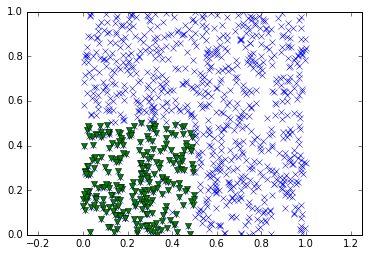

In [14]:
#clear
pt.axis("equal")

pt.plot(x[:,0], x[:,1], "x")
last_bl = bl_idx[-1]
pt.plot(x_new[:last_bl,0], x_new[:last_bl,1], "v")